In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv

import warnings
warnings.filterwarnings("ignore")

plt.rc('font', family = 'Malgun Gothic')

In [121]:
df = pd.read_csv('./Data/titanic_train.csv', index_col = 0)

In [122]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [124]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [125]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Pclass', ylabel='count'>

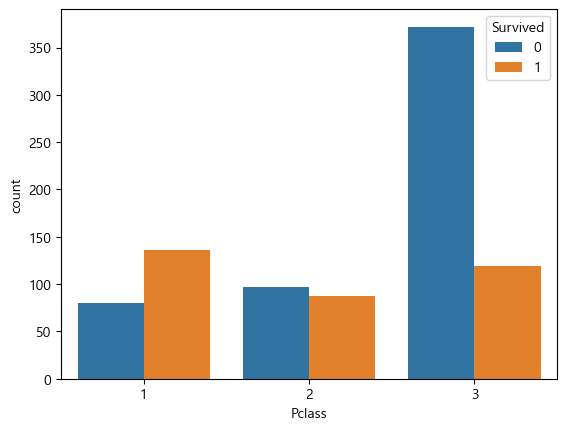

In [126]:
sns.countplot(df, x = 'Pclass', hue = 'Survived')

<Axes: xlabel='Embarked', ylabel='count'>

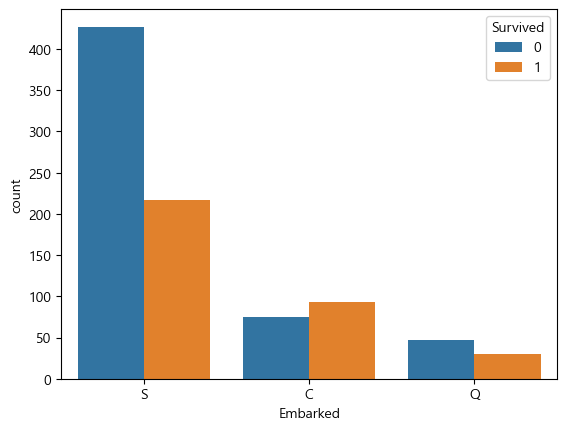

In [127]:
sns.countplot(df, x = 'Embarked', hue = 'Survived')

In [128]:
df[df['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [129]:
df['Embarked'] = df['Embarked'].fillna('S')

<Axes: xlabel='Sex', ylabel='count'>

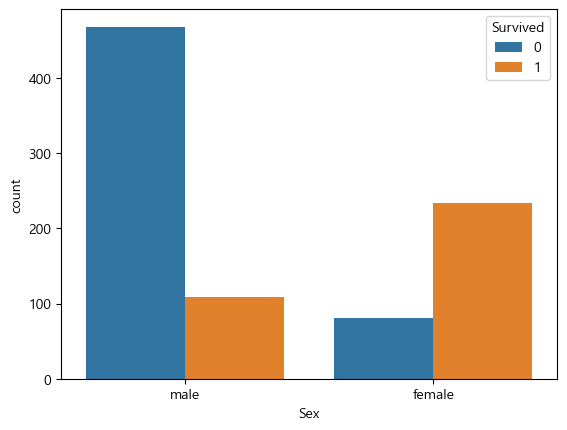

In [130]:
sns.countplot(df, x = 'Sex', hue = 'Survived')

In [131]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [132]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, confusion_matrix , classification_report, root_mean_squared_error, mean_squared_error, r2_score

In [133]:
df_bmi = pd.read_csv('./Data/bmi_500.csv')

In [134]:
df_bmi.head()

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight


In [135]:
x_train, x_test, y_train, y_test = train_test_split(df_bmi[["Weight", "Height"]], df_bmi["Label"], random_state = 42)

In [136]:
dec = DecisionTreeClassifier(max_depth = 10, max_leaf_nodes = 20)

In [137]:
dec.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=20)

In [138]:
pred_dec = dec.predict(x_test)

In [139]:
dec.score(x_test,y_test)

0.84

In [140]:
confusion_matrix(y_test, pred_dec)

array([[44,  0,  0,  4,  0,  0],
       [ 0,  1,  0,  0,  0,  0],
       [ 0,  0, 18,  1,  1,  4],
       [ 3,  0,  0, 31,  4,  0],
       [ 0,  0,  1,  2,  7,  0],
       [ 0,  0,  0,  0,  0,  4]])

In [141]:
accuracy_score(y_test, pred_dec)

0.84

In [142]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [143]:
pred_rf = rf.predict(x_test)

In [144]:
rf.score(x_test,y_test)

0.872

In [145]:
confusion_matrix(y_test, pred_rf)

array([[46,  0,  0,  2,  0,  0],
       [ 0,  1,  0,  0,  0,  0],
       [ 0,  0, 21,  1,  2,  0],
       [ 7,  0,  0, 28,  3,  0],
       [ 0,  0,  1,  0,  9,  0],
       [ 0,  0,  0,  0,  0,  4]])

In [146]:
accuracy_score(y_test, pred_rf)

0.872

In [147]:
print(classification_report(y_test,pred_rf))

                 precision    recall  f1-score   support

Extreme Obesity       0.87      0.96      0.91        48
 Extremely Weak       1.00      1.00      1.00         1
         Normal       0.95      0.88      0.91        24
        Obesity       0.90      0.74      0.81        38
     Overweight       0.64      0.90      0.75        10
           Weak       1.00      1.00      1.00         4

       accuracy                           0.87       125
      macro avg       0.89      0.91      0.90       125
   weighted avg       0.88      0.87      0.87       125



In [169]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [149]:
df_bmi['Gender'] = [1 if i == 'Male' else 0 for i in df_bmi['Gender']]
df_bmi = pd.concat([df_bmi, pd.get_dummies(df_bmi['Label']).astype(int)], axis= 1)

In [151]:
x = df_bmi[["Gender", "Height", "Extreme Obesity", "Extremely Weak", "Normal", "Obesity", "Overweight", "Weak"]]
y= df_bmi["Weight"]

In [153]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.25)

In [154]:
dec_lr = DecisionTreeRegressor()
dec_lr.fit(x_train,y_train)

DecisionTreeRegressor()

In [156]:
pred_dec_lr = dec_lr.predict(x_test)

In [160]:
root_mean_squared_error(y_test, pred_dec_lr)

17.538317035692003

In [161]:
r2_score(y_test, pred_dec_lr)

0.7007272375063363

In [163]:
rf_lr = RandomForestRegressor()
rf_lr.fit(x_train,y_train)

RandomForestRegressor()

In [164]:
pred_rf_lr = rf_lr.predict(x_test)

In [165]:
root_mean_squared_error(y_test, pred_rf_lr)

15.800447169922638

In [166]:
r2_score(y_test, pred_rf_lr)

0.7570985452190861

In [171]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [173]:
pred_lr = lr.predict(x_test)

In [174]:
root_mean_squared_error(y_test, pred_lr)

14.632580076169189

In [175]:
r2_score(y_test, pred_lr)

0.7916789391389807

In [176]:
lasso = Lasso()
lasso.fit(x_train, y_train)

Lasso()

In [181]:
pred_lasso = lasso.predict(x_test)

In [182]:
root_mean_squared_error(y_test, pred_lasso)

15.913912972752495

In [183]:
r2_score(y_test, pred_lasso)

0.7535973824337685

In [180]:
ridge = Ridge()
ridge.fit(x_train, y_train)

Ridge()

In [184]:
pred_ridge = ridge.predict(x_test)

In [185]:
root_mean_squared_error(y_test, pred_ridge)

14.632749840259503

In [186]:
r2_score(y_test, pred_ridge)

0.7916741053174184

-Linear    rmse 14.63 r2 0.79    
-Dec       rmse 17.53 r2 0.70    
-RF        rmse 15.80 r2 0.75    
-Lasso     rmse 15.91 r2 0.75     
-Ridge     rmse 14.63 r2 0.79